# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinan
Processing Record 2 of Set 1 | jayapura
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | hadibu
Processing Record 13 of Set 1 | smithers
Processing Record 14 of Set 1 | coronel dorrego
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | selfoss
Processing Record 20 of Set 1 | beteza
City not found. Skipping...
Processing Record 21

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv("../output_data/cities.csv")
#city_data_df = pd.DataFrame(city_data_df)
# Show Record Count
city_data_df.count()

City_ID       577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

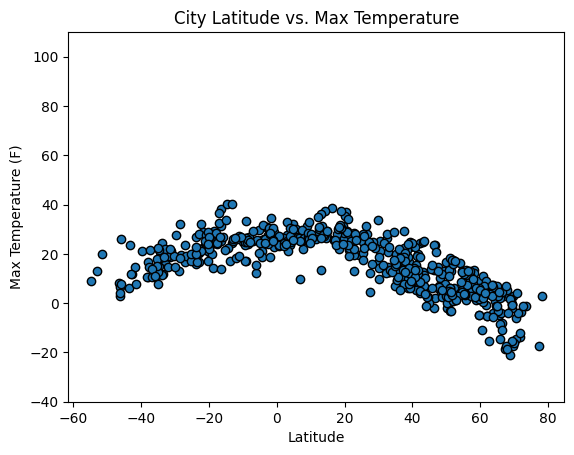

In [19]:
#import matplotlib.pyplot as plt

# Create a scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Set the y axis limit
plt.ylim(-40, 110)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

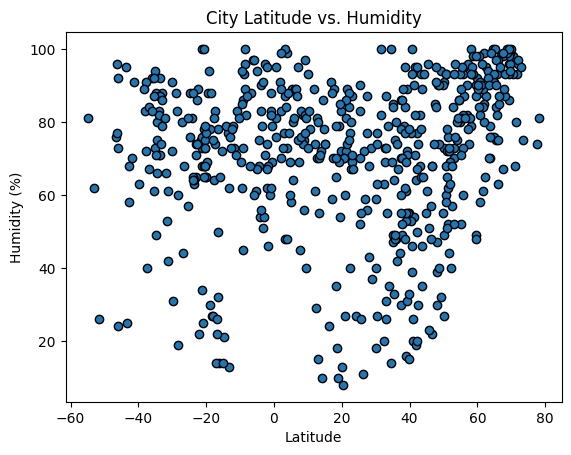

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

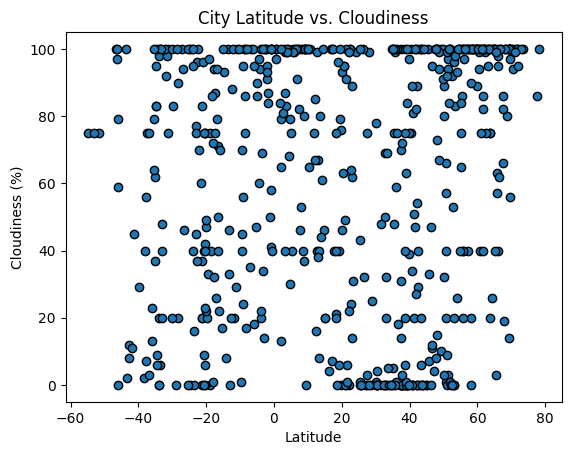

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

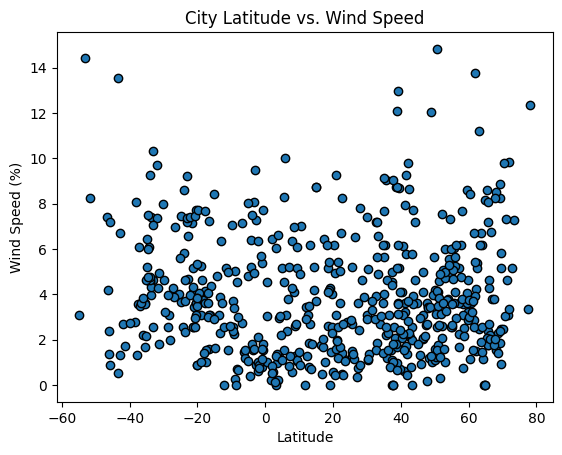

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties

plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


R-squared: 0.36742364524600435


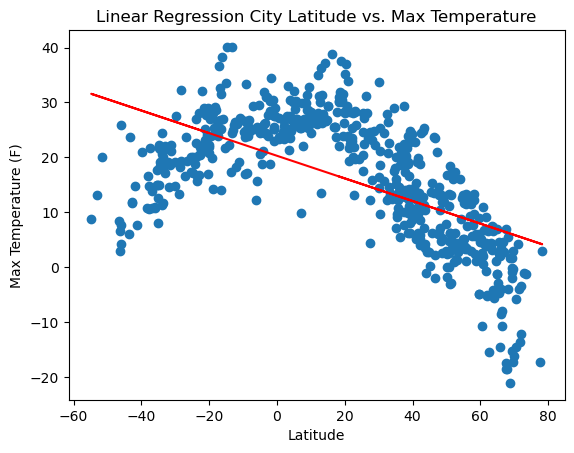

R-squared: 0.015504221318853569


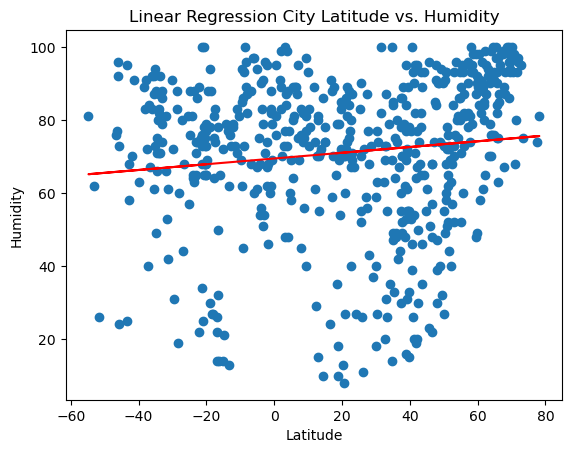

R-squared: 0.010380271047196899


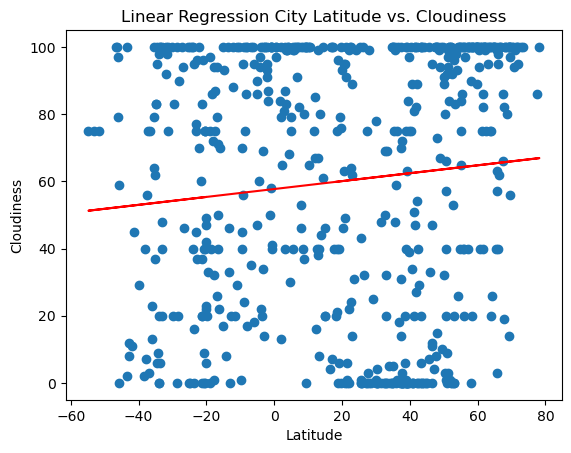

R-squared: 0.0008841524892730146


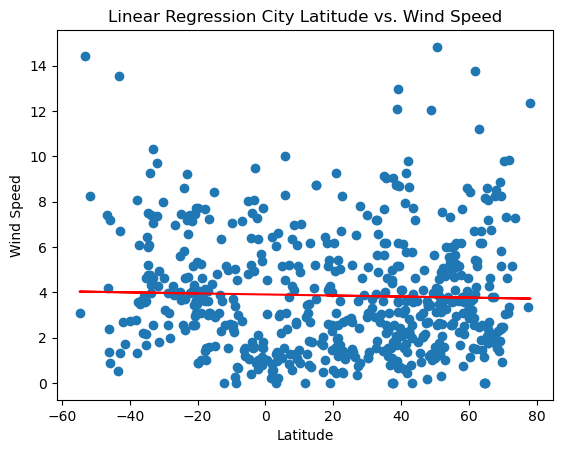

In [23]:
# Define a function to create Linear Regression plots
# Compute linear regression for latitude vs. temperature
slope, intercept, rvalue, pvalue, stderr = linregress(city_data_df['Lat'], city_data_df['Max Temp'])
# Print the R-squared value
print(f"R-squared: {rvalue**2}")
# Plot the scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Plot the regression line
regress_values = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Linear Regression City Latitude vs. Max Temperature")

# Save the plot
plt.savefig("output_data/Fig5 Linear Regress Lat Vs Max Temp.png")
# Show the plot
plt.show()


# Compute linear regression for latitude vs. Humidity
slope, intercept, rvalue, pvalue, stderr = linregress(city_data_df['Lat'], city_data_df['Humidity'])

# Print the R-squared value
print(f"R-squared: {rvalue**2}")

# Plot the scatter plot for latitude vs. Humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Plot the regression line
regress_values = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Linear Regression City Latitude vs. Humidity")

# Save the plot
plt.savefig("output_data/Fig6 Lat Vs Humidity.png")
# Show the plot
plt.show()



# Compute linear regression for latitude vs. Cloudiness
slope, intercept, rvalue, pvalue, stderr = linregress(city_data_df['Lat'], city_data_df['Cloudiness'])

# Print the R-squared value
print(f"R-squared: {rvalue**2}")
# Plot the scatter plot 
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])


# Plot the regression line
regress_values = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear Regression City Latitude vs. Cloudiness")

# Save the plot
plt.savefig("output_data/Fig7 Lat Vs Cloudiness.png")
# Show the plot
plt.show()


# Compute linear regression for latitude vs. Wind Speed
slope, intercept, rvalue, pvalue, stderr = linregress(city_data_df['Lat'], city_data_df['Wind Speed'])

# Print the R-squared value
print(f"R-squared: {rvalue**2}")

# Plot the scatter plot for latitude vs. Wind Speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Plot the regression line
regress_values = slope * city_data_df['Lat'] + intercept
plt.plot(city_data_df['Lat'], regress_values, "r-")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear Regression City Latitude vs. Wind Speed")

# Save the plot
plt.savefig("output_data/Fig8 Lat Vs Wind Speed.png")
# Show the plot
plt.show()


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

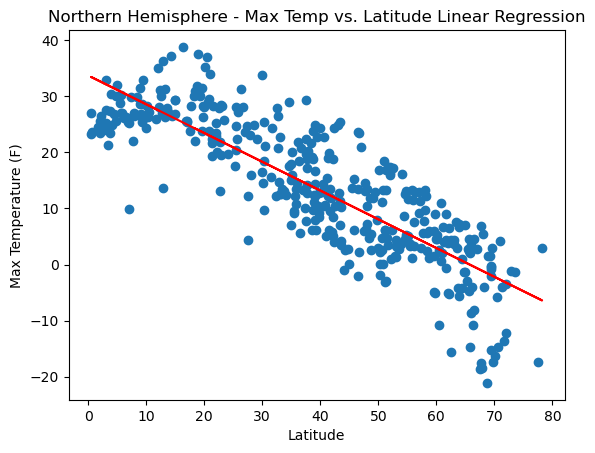

In [28]:
# Linear regression on Northern Hemisphere
import scipy.stats as st
north_df = city_data_df[city_data_df['Lat'] >= 0]
# Set x and y values
x_values = north_df['Lat']
y_values = north_df['Max Temp']
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate regression line values
regress_values = slope * x_values + intercept
# Create equation of line to print on plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Create scatter plot
plt.scatter(x_values, y_values)
# Plot regression line
plt.plot(x_values, regress_values, "r-")
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
# Print equation of line on plot
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
# Print r-squared value on plot
plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (-50, 70), fontsize=15, color="red")
# Save the figure
plt.savefig("output_data/Fig14 Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
# Show plot
plt.show()

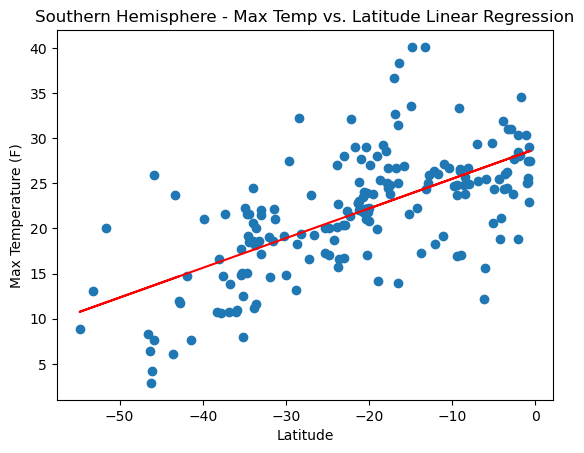

In [29]:
# Linear regression on Southern Hemisphere
import scipy.stats as st
south_df = city_data_df[city_data_df['Lat'] < 0]
# Set x and y values
x_values = south_df['Lat']
y_values = south_df['Max Temp']
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate regression line values
regress_values = slope * x_values + intercept
# Create equation of line to print on plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Create scatter plot
plt.scatter(x_values, y_values)
# Plot regression line
plt.plot(x_values, regress_values, "r-")
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
# Print equation of line on plot
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
# Print r-squared value on plot
plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (-50, 70), fontsize=15, color="red")
# Save the figure
plt.savefig(output_data/Fig15 Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
# Show plot
plt.show()

### Humidity vs. Latitude Linear Regression Plot

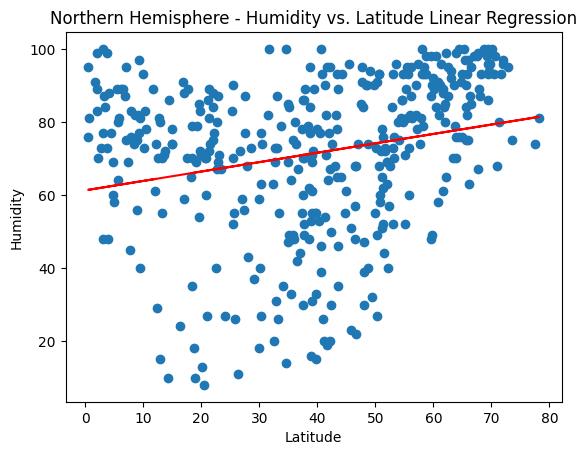

In [34]:
# Northern Hemisphere
north_df = city_data_df[city_data_df['Lat'] >= 0]
# Set x and y values
x_values = north_df['Lat']
y_values = north_df['Humidity']
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate regression line values
regress_values = slope * x_values + intercept
# Create equation of line to print on plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Create scatter plot
plt.scatter(x_values, y_values)
# Plot regression line
plt.plot(x_values, regress_values, "r-")
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
# Print equation of line on plot
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
# Print r-squared value on plot
plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (-50, 70), fontsize=15, color="red")
# Save the figure
plt.savefig("output_data/Fig16 Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
# Show plot
plt.show()

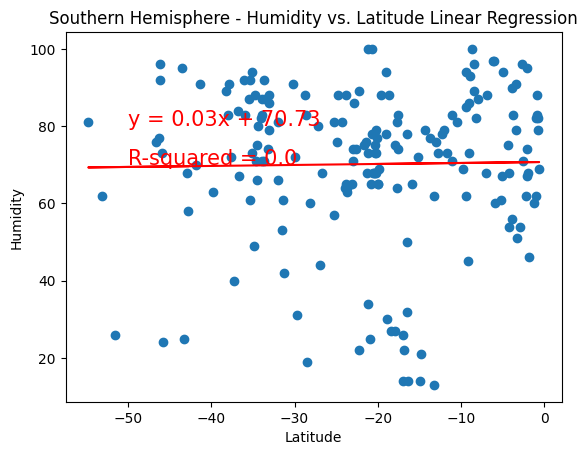

In [36]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
south_df = city_data_df[city_data_df['Lat'] < 0]
# Set x and y values
x_values = south_df['Lat']
y_values = south_df['Humidity']
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate regression line values
regress_values = slope * x_values + intercept
# Create equation of line to print on plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Create scatter plot
plt.scatter(x_values, y_values)
# Plot regression line
plt.plot(x_values, regress_values, "r-")
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
# Print equation of line on plot
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
# Print r-squared value on plot
plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (-50, 70), fontsize=15, color="red")
# Save the figure
plt.savefig("output_data/Fig10 Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

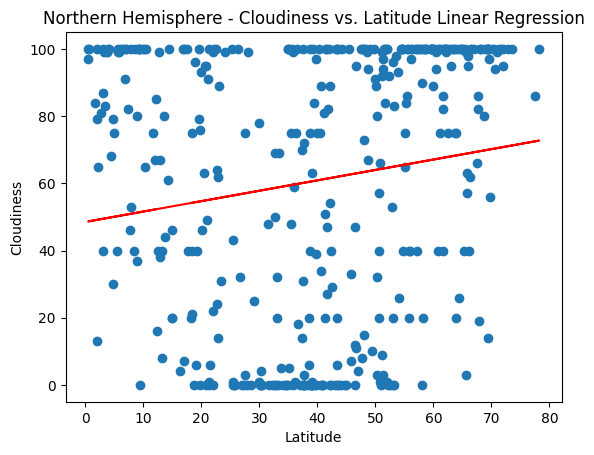

In [37]:
# Northern Hemisphere
north_df = city_data_df[city_data_df['Lat'] >= 0]
# Set x and y values
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate regression line values
regress_values = slope * x_values + intercept
# Create equation of line to print on plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Create scatter plot
plt.scatter(x_values, y_values)
# Plot regression line
plt.plot(x_values, regress_values, "r-")
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
# Print equation of line on plot
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
# Print r-squared value on plot
plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (-50, 70), fontsize=15, color="red")
# Save the figure
plt.savefig("output_data/Fig15 Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
# Show plot
plt.show()

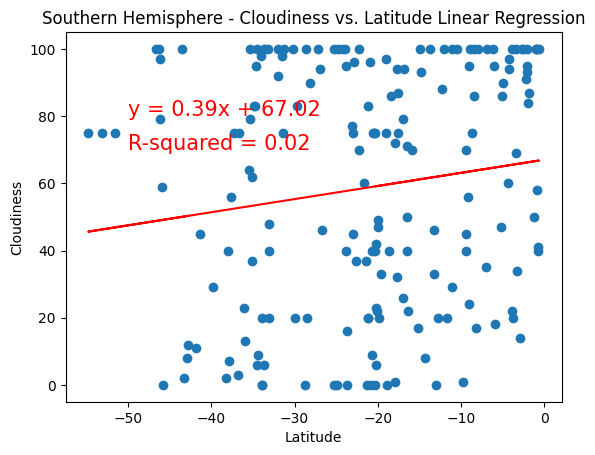

In [38]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
south_df = city_data_df[city_data_df['Lat'] < 0]
# Set x and y values
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate regression line values
regress_values = slope * x_values + intercept
# Create equation of line to print on plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Create scatter plot
plt.scatter(x_values, y_values)
# Plot regression line
plt.plot(x_values, regress_values, "r-")
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
# Print equation of line on plot
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
# Print r-squared value on plot
plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (-50, 70), fontsize=15, color="red")
# Save the figure
plt.savefig("output_data/Fig11 Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

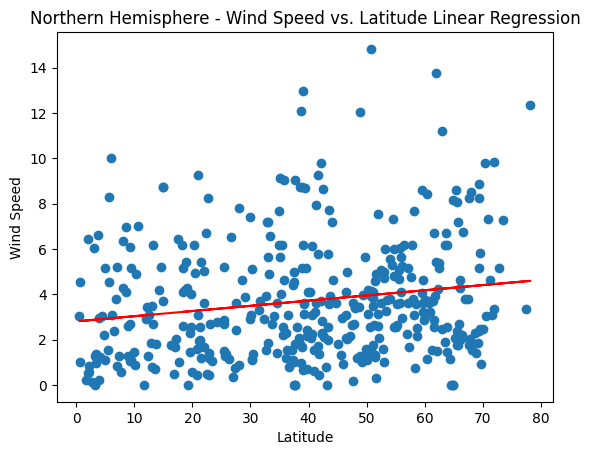

In [39]:
# Northern Hemisphere
north_df = city_data_df[city_data_df['Lat'] >= 0]
# Set x and y values
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate regression line values
regress_values = slope * x_values + intercept
# Create equation of line to print on plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Create scatter plot
plt.scatter(x_values, y_values)
# Plot regression line
plt.plot(x_values, regress_values, "r-")
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
# Print equation of line on plot
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
# Print r-squared value on plot
plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (-50, 70), fontsize=15, color="red")
# Save the figure
plt.savefig("output_data/Fig17 Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
# Show plot
plt.show()

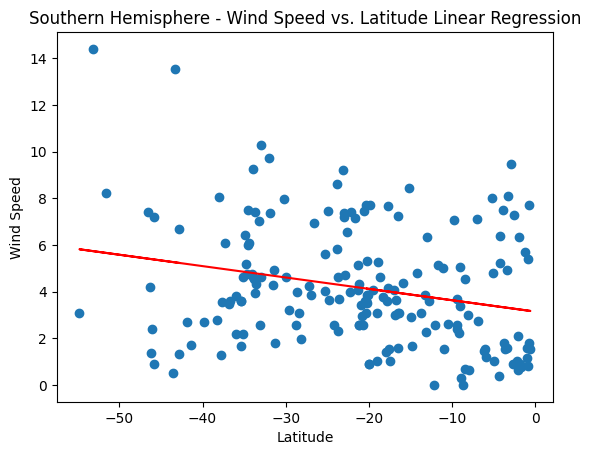

In [40]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
south_df = city_data_df[city_data_df['Lat'] < 0]
# Set x and y values
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
# Calculate regression line values
regress_values = slope * x_values + intercept
# Create equation of line to print on plot
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Create scatter plot
plt.scatter(x_values, y_values)
# Plot regression line
plt.plot(x_values, regress_values, "r-")
# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
# Print equation of line on plot
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
# Print r-squared value on plot
plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (-50, 70), fontsize=15, color="red")
# Save the figure
plt.savefig("output_data/Fig12 Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-value is: -0.03


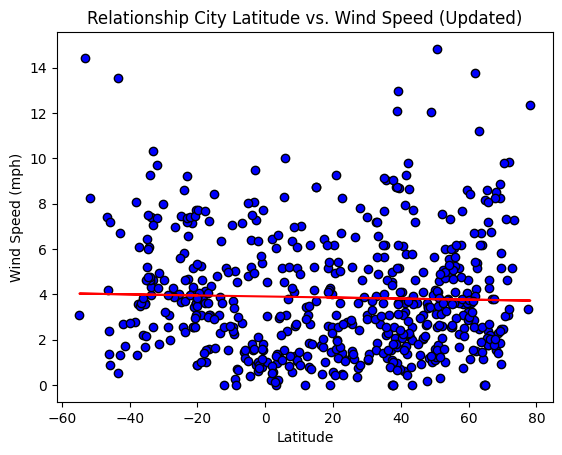

In [41]:
# Create scatter plot of wind speed vs. latitude for entire data set
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
# Set title and axis labels
plt.title("Relationship City Latitude vs. Wind Speed (Updated)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Perform linear regression on wind speed vs. latitude for entire data set
slope, intercept, rvalue, pvalue, stderr = linregress(city_data_df["Lat"], city_data_df["Wind Speed"])
regress_values = slope * city_data_df["Lat"] + intercept
# Create equation of line to add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (10,30), fontsize=15, color="red")
# Add regression line to scatter plot
plt.plot(city_data_df["Lat"], regress_values, "r-")
# Print r-value
print(f"The r-value is: {round(rvalue,2)}")
# Save the figure
plt.savefig("output_data/Fig13.png")
# Show the plot
plt.show()